# <p align='center'>Лабораторная работа №6</p>

<p align='right'>Выполнил: студент гр. 5.306М Лаптев А.В.</p>

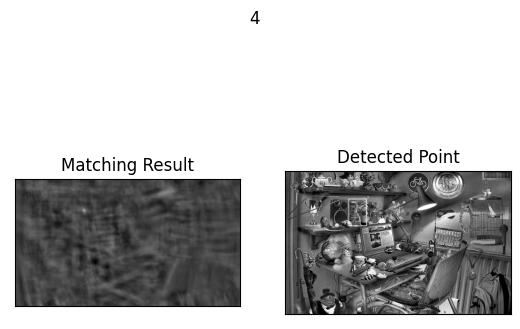

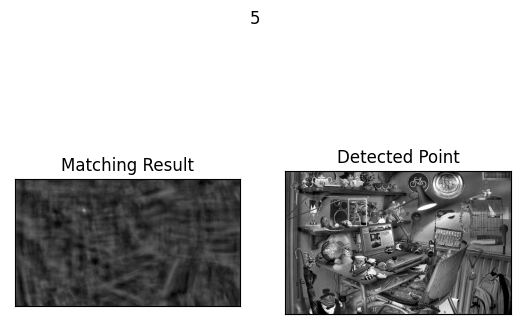

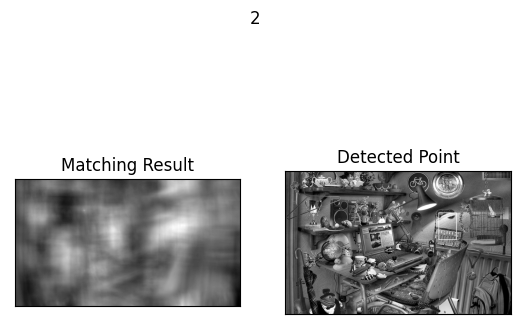

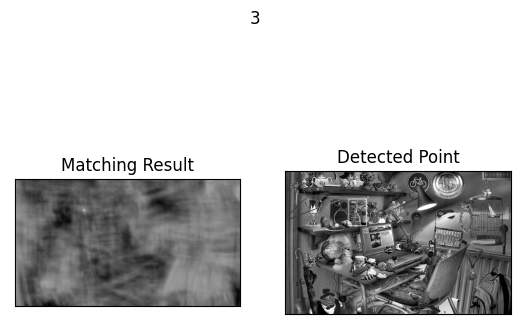

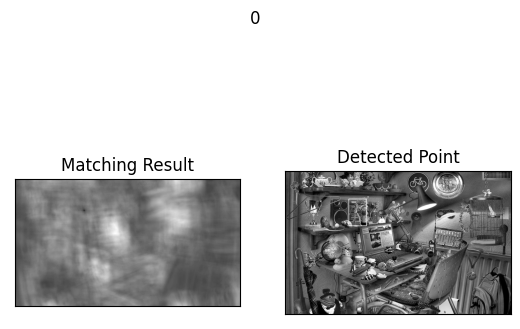

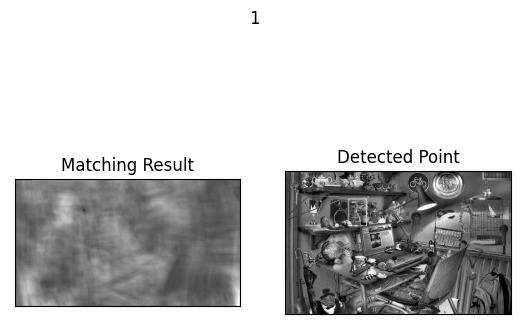

In [3]:
import cv2
from matplotlib import pyplot as plt


img = cv2.imread('../resources/room.png', 0)
img2 = img.copy()
template = cv2.imread('../resources/man.png', 0)
width, height = template.shape[::-1]

# Методы сравнения в виде списка
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for method in methods:
    img = img2.copy()
    method = eval(method)

    # Применение шаблона
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Выделяем область
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(122)
    plt.imshow(img, cmap='gray')
    plt.title('Detected Point')
    plt.xticks([])
    plt.yticks([])

    plt.suptitle(method)

    plt.show()

In [4]:
import numpy as np


img_rgb = cv2.imread('../resources/mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('../resources/money.jpg', 0)
width, height = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(
        img_rgb,
        pt,
        (pt[0] + width, pt[1] + height),
        (0, 0, 255),
        2
    )

cv2.imwrite('../resources/res.png', img_rgb)

True